In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [2]:
n = 15
x_i = 0
x_f = 2
sigma = 0.2

x = np.linspace(x_i,x_f,n)
y_t = 3*x + 2
y_dis = sigma*np.random.randn(n)
y = y_t + y_dis
y_err = sigma + 0.01*np.random.randn(n)
np.savetxt('recta.txt',(x,y,y_err))

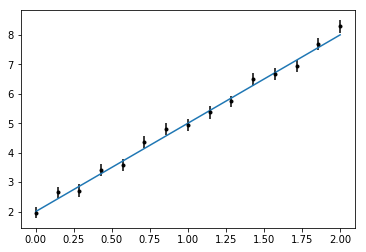

In [3]:
plt.errorbar(x,y,yerr=y_err, fmt='k.',ecolor='black')
plt.plot(x,y_t);

In [4]:
x = np.loadtxt('recta.txt')[0]
y = np.loadtxt('recta.txt')[1]
y_err = np.loadtxt('recta.txt')[2]

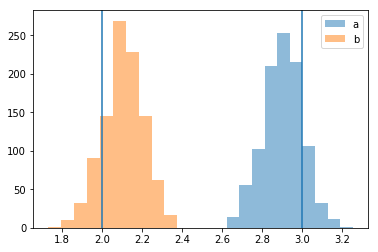

In [5]:
a0,sigma_a0= 2.9,0.1 
b0,sigma_b0 = 2.1,0.1

a_t = 3
b_t = 2

a_sample = np.random.normal(a0,sigma_a0,1000)
b_sample = np.random.normal(b0,sigma_b0,1000)

plt.hist(a_sample,alpha = 0.5, label = 'a')
plt.hist(b_sample,alpha = 0.5, label = 'b')
plt.axvline(a_t)
plt.axvline(b_t)
plt.legend();

In [7]:
chisq_ = np.zeros_like(a_sample)
for i in range(len(a_sample)):
    chisq_[i] = chisq([a_sample[i],b_sample[i]],[x,y,y_err])

In [8]:
minimo = np.where(chisq_==np.min(chisq_))[0][0]

print('a minimo es:',a_sample[minimo])
print('b minimo es:',b_sample[minimo])

a minimo es: 3.004607722854492
b minimo es: 2.037384000672194


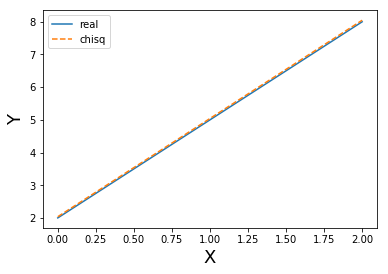

In [9]:
plt.plot(x,y_t,label = 'real')
plt.plot(x,a_sample[minimo]*x+b_sample[minimo],'--',label = 'chisq')
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.legend();

In [10]:
import random
random.randint(1,10000000)/10000000

0.387855

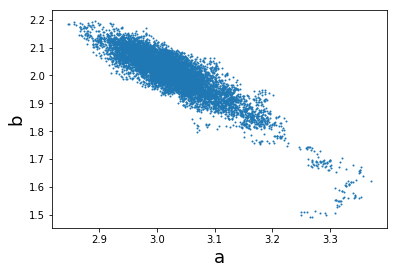

In [125]:
np.random.seed(1)

a_ini = 3.25
b_ini = 1.5
ch_0 = chisq([a_ini,b_ini],[x,y,y_err])

a = [a_ini]
b = [b_ini]

chisMK = []

d_a = 0.01
d_b = 0.01

for i in range(10000): 
    a_af = np.random.normal(a_ini,d_a) 
    b_af = np.random.normal(b_ini,d_b) 
    ch = chisq([a_af,b_af],[x,y,y_err])
    if ch < ch_0:
        chisMK.append(ch)
        a.append(a_af)
        b.append(b_af)
        a_ini = a_af
        b_ini = b_af
        ch_0 = ch
        
    else:
        r = -np.log(np.random.uniform(0,1))
        diff = ch-ch_0
        if diff<r:
            chisMK.append(ch)
            a.append(a_af)
            b.append(b_af)
            a_ini = a_af
            b_ini = b_af
            ch_0 = ch
            
plt.scatter(a,b,s=1)
plt.xlabel('a',fontsize=18)
plt.ylabel('b',fontsize=18)
plt.show()


<Figure size 432x288 with 0 Axes>

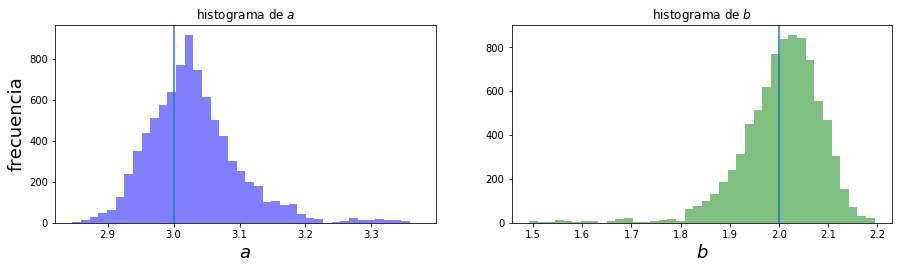

In [120]:
plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.axvline(a_t)
plt.hist(a, bins=40,facecolor='blue',alpha = 0.5)
plt.title("histograma de $a$")
plt.xlabel("$a$",fontsize=18)
plt.ylabel("frecuencia",fontsize=18)

plt.subplot(222)
plt.axvline(b_t)
plt.hist(b, bins=40,facecolor='g', alpha = 0.5)
plt.title("histograma de $b$")
plt.xlabel("$b$",fontsize=18)
plt.show();

In [6]:
#Modelo
def recta(x,a,b):
    return a*x + b

#Funcion para calcular la chi cuadrada
def chisq(theta,data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x,theta[0],theta[1])
    chisq = (y-model)**2 / y_err**2
    
    return chisq.sum()

In [268]:
def metrop(a_ini,b_ini,data,sigm):
    
    a_ini = a_ini.T.reshape((len(a_ini),1))
    b_ini = b_ini.T.reshape((len(b_ini),1))
    data = np.array(data)
    #data es [x,y,y_err]
    
    ch_ini = []
    
    for i in range(len(a_ini)):
        ch_ini.append(chisq([a_ini[i][0],b_ini[i][0]],data))
    
    a = a_ini.tolist()
    b = b_ini.tolist()
    
    for i in range(len(ini[0])):
        ch_0 = ch_ini[i]
        k = 0
        for j in range(10000): 
            a_af = np.random.normal(a[i][k],sigm) 
            b_af = np.random.normal(b[i][k],sigm) 
            ch = chisq([a_af,b_af],data)
            
            if ch < ch_0:
                a[i].append(a_af)
                b[i].append(b_af)
                k = k+1
                ch_0 = ch
            else:
                r = np.random.uniform(0,1) 
                diff = abs(ch-ch_0)
                if diff<r:
                    a[i].append(a_af)
                    b[i].append(b_af)
                    k = k+1
                    ch_0 = ch
    
    a_tot = []
    b_tot = []
    
    for i in range(len(ini[0])): 
        a[i] = a[i][100:]
        a_tot.append(a[i])
        b[i] = b[i][100:]
        b_tot.append(b[i])
    
    for i in range(len(ini[0])):     
        plt.scatter(a[i],b[i])
        #plt.plot(a[i],b[i],'--')
        
    plt.xlabel('a',fontsize=18)
    plt.ylabel('b',fontsize=18);
    
    return np.array(a_tot)

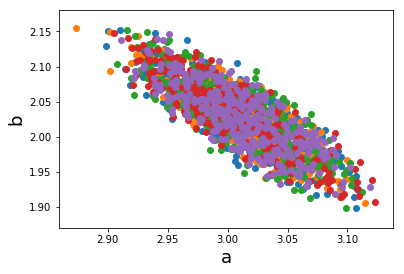

In [269]:
data = [x,y,y_err]
sigm = 0.01
a_ini = np.array([1.3,2.4,0.5,4,8])
b_ini = np.array([0.1,3.4,2.3,0.5,2.4])

a = metrop(a_ini,b_ini,data,sigma)